In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from util import make_n_runs_and_avg_stats
from GNNFakeNews.utils.helpers.hyperparameter_factory import HparamFactory
from GNNFakeNews.utils.helpers.gnn_model_explainer import  GNNModelExplainer
from GNNFakeNews.utils.enums import GNNDatasetTypeEnum, GNNModelTypeEnum, GNNFeatureTypeEnum

In [3]:
model_type = GNNModelTypeEnum.UPFD_GCNFN
# follow the paper of UPFD for best performance.
model, dataset_manager = make_n_runs_and_avg_stats(model_type, hparams=HparamFactory(model_type, dataset=GNNDatasetTypeEnum.GOSSIPCOP), n=1)

#################################
-----> The hyperparameters are set!
model_type = GNNModelTypeEnum.UPFD_GCNFN
dataset = GNNDatasetTypeEnum.GOSSIPCOP
batch_size = 128
lr = 0.01
weight_decay = 0.001
n_hidden = 128
epochs = 60
transform = <GNNFakeNews.utils.data_loader.ToUndirected object at 0x7faacbbbd310>
feature = GNNFeatureTypeEnum.SPACY
concat = True
#################################
Loading dataset 'gossipcop' from directory: /home/sersery/Desktop/TUM Informatik/SS22/Thesis/Code/Explainability_of_FND_Models/GNNFakeNews/data/local
Test set results: acc: 0.9498, f1_macro: 0.9495, f1_micro: 0.9498,precision: 0.9265, recall: 0.9777, auc: 0.9720, ap: 0.9675


all_last_layer_val size: (5464, 256)
all_y size: (5464,)


/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


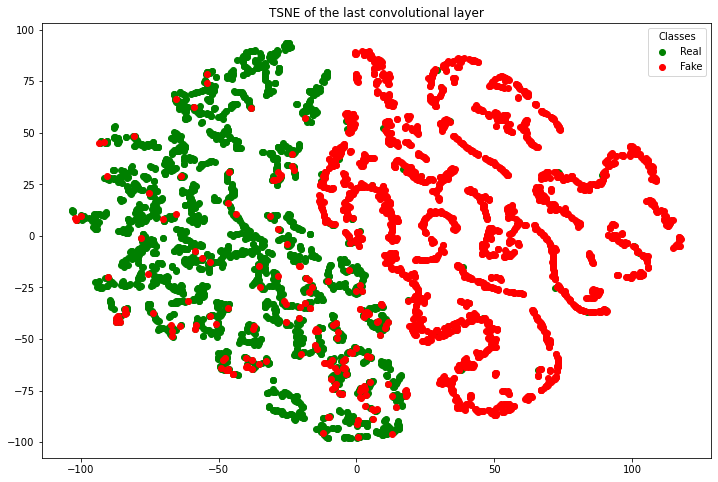

In [6]:
model.m_visualize_tsne_of_last_conv_layer(split='all')

test_last_layer_val size: (3826, 256)
test_y size: (3826,)


/home/sersery/Applications/anaconda3/envs/gnnfakenews/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


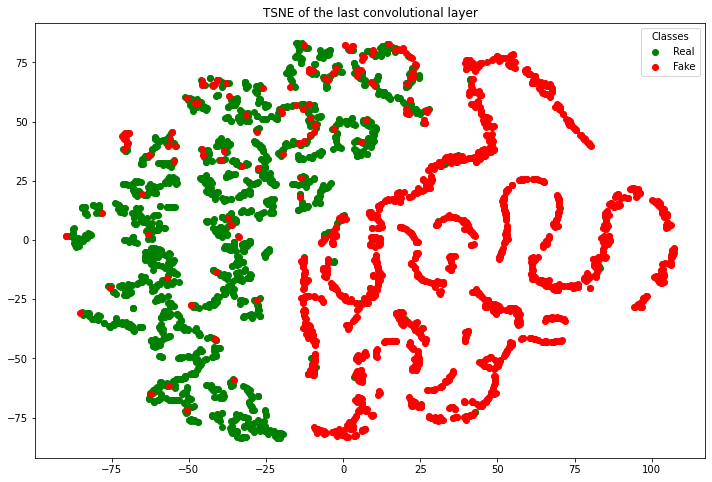

In [5]:
model.m_visualize_tsne_of_last_conv_layer(split='test')

### Randomly pick a fake news instance

In [5]:
sample_data = dataset_manager.get_random_train_samples(device=model.m_args.device, label=0)[0]
explainer = GNNModelExplainer(model, sample_data)

Choosing indexes: [758]


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 229.17it/s]


y: Fake
Removing edges with score less than 0.10682343691587448 with min torch.return_types.min(
values=tensor(0.0649),
indices=tensor(17)) and max torch.return_types.max(
values=tensor(0.9373),
indices=tensor(37))
Dropping 70 edges out of 139


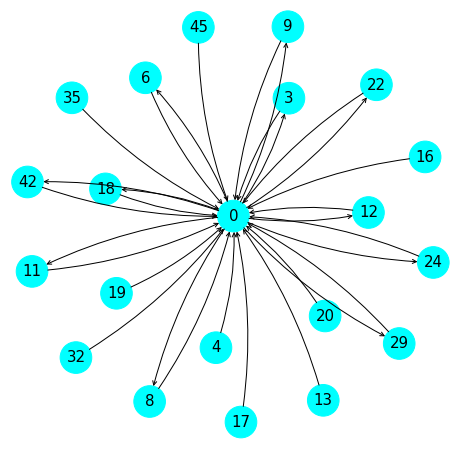

In [6]:
explainer.visualize_explaining_graph()

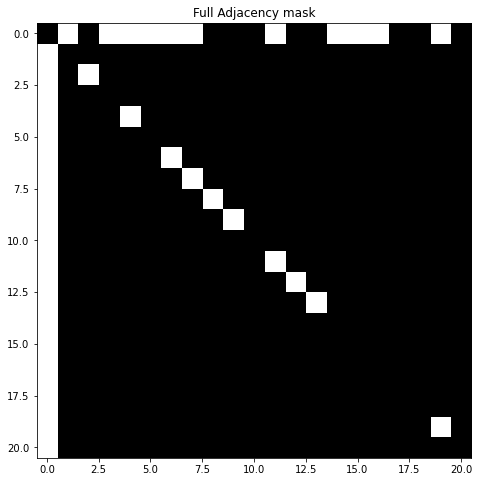

In [7]:
explainer.visualize_adjacency_matrix()

In [8]:
explainer.node_feat_mask

tensor([0.1416, 0.1278, 0.1444, 0.5768, 0.1358, 0.1710, 0.1589, 0.5612, 0.1333,
        0.7361, 0.1378, 0.1346, 0.1454, 0.1724, 0.1349, 0.1309, 0.1621, 0.6268,
        0.1099, 0.4843, 0.1623, 0.1348, 0.1213, 0.3035, 0.1810, 0.1475, 0.1452,
        0.1058, 0.1683, 0.1628, 0.3359, 0.1560, 0.1503, 0.1378, 0.1958, 0.2038,
        0.1565, 0.1340, 0.0998, 0.1309, 0.7048, 0.1070, 0.1391, 0.1221, 0.0901,
        0.1247, 0.1608, 0.1033, 0.1323, 0.1363, 0.1409, 0.1408, 0.1705, 0.1292,
        0.1198, 0.1291, 0.1163, 0.1884, 0.1674, 0.1457, 0.6911, 0.1456, 0.3781,
        0.1392, 0.1595, 0.1648, 0.1268, 0.1673, 0.1244, 0.0996, 0.1077, 0.1303,
        0.1415, 0.1221, 0.1212, 0.1644, 0.1423, 0.1519, 0.1628, 0.1583, 0.1386,
        0.1422, 0.1075, 0.1764, 0.1174, 0.1577, 0.1910, 0.1436, 0.1556, 0.1482,
        0.1297, 0.1849, 0.1385, 0.1470, 0.1434, 0.1194, 0.1539, 0.1465, 0.1456,
        0.1323, 0.1478, 0.1418, 0.1514, 0.7491, 0.1373, 0.1539, 0.1688, 0.1396,
        0.1502, 0.1087, 0.1684, 0.1364, 

### Randomly sample 10 fake news instances and explain them

Choosing indexes: [821 862 248  58 817 850 375 102 424 302]


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 213.18it/s]


y: Fake
Removing edges with score less than 0.11922093480825424 with min 0.07755360007286072 and max 0.9379866719245911
Dropping 118 edges out of 235


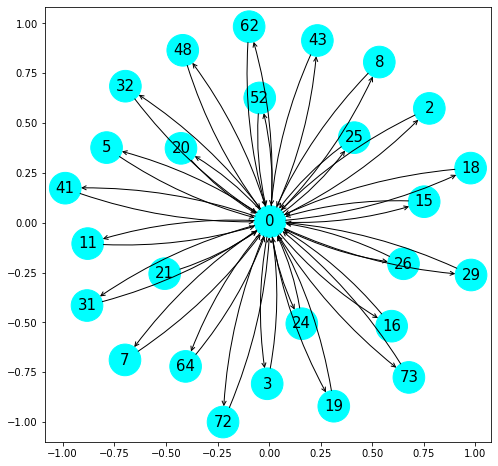

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 242.41it/s]


y: Fake
Removing edges with score less than 0.10402008891105652 with min 0.06724780052900314 and max 0.9339454174041748
Dropping 74 edges out of 148


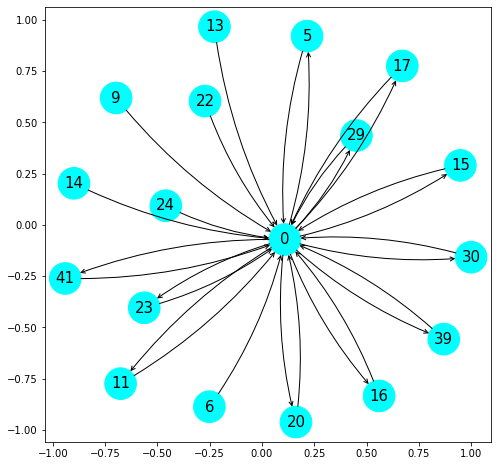

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 216.35it/s]


y: Fake
Removing edges with score less than 0.09555871784687042 with min 0.0666307583451271 and max 0.9496073126792908
Dropping 37 edges out of 73


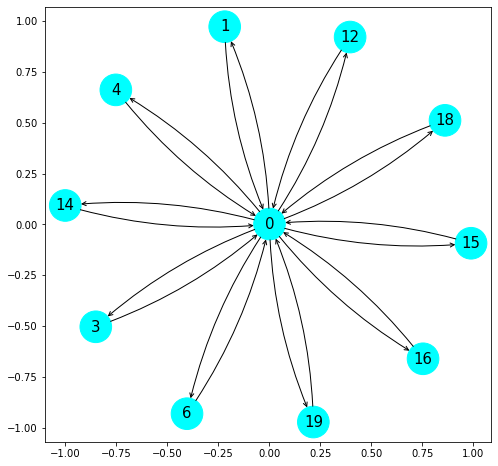

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 332.53it/s]


y: Fake
Removing edges with score less than 0.10846152901649475 with min 0.08188830316066742 and max 0.9475552439689636
Dropping 80 edges out of 160


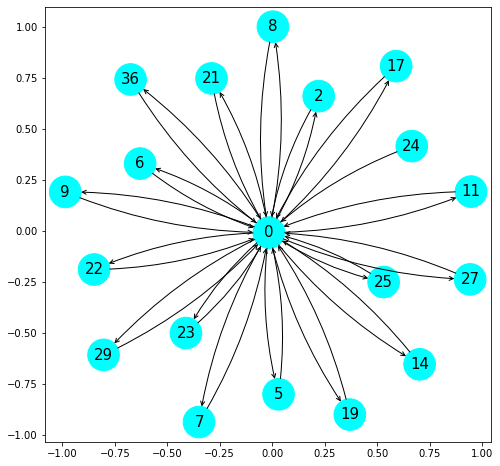

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 341.25it/s]


y: Fake
Removing edges with score less than 0.1208396852016449 with min 0.08394048362970352 and max 0.9139622449874878
Dropping 122 edges out of 244


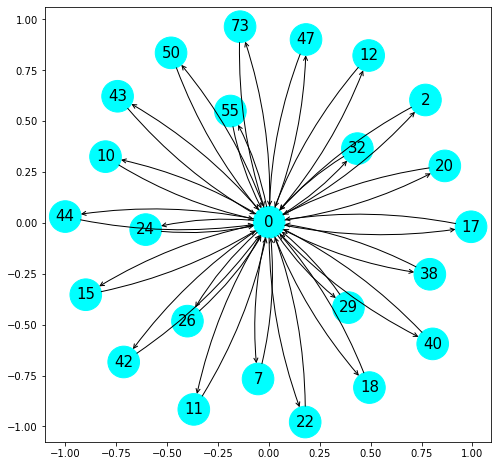

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 342.83it/s]


y: Fake
Removing edges with score less than 0.10538354516029358 with min 0.06727934628725052 and max 0.9406249523162842
Dropping 82 edges out of 163


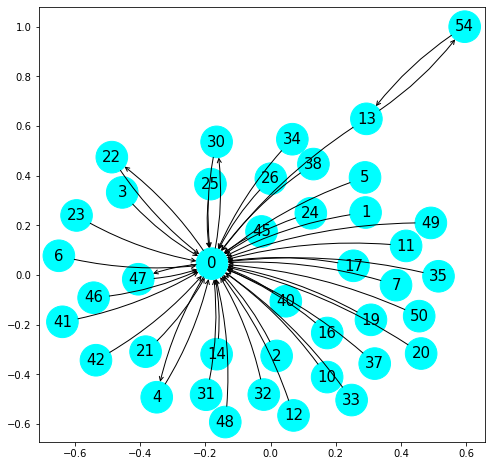

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 341.55it/s]


y: Fake
Removing edges with score less than 0.11966526508331299 with min 0.08647917211055756 and max 0.9052007794380188
Dropping 124 edges out of 247


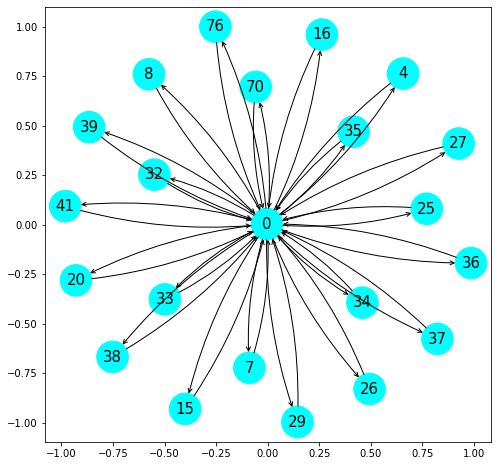

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 340.86it/s]


y: Fake
Removing edges with score less than 0.13052192330360413 with min 0.09200254082679749 and max 0.9182403087615967
Dropping 227 edges out of 454


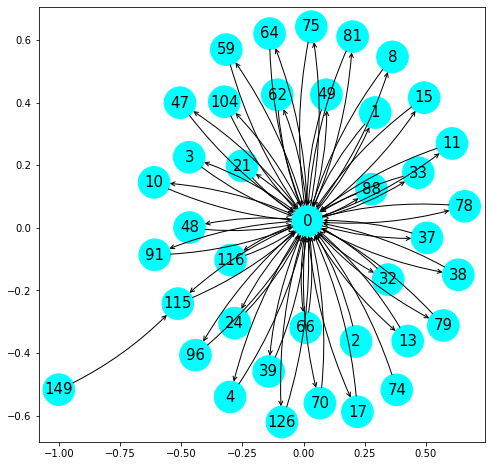

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 253.05it/s]


y: Fake
Removing edges with score less than 0.08879528939723969 with min 0.05084023252129555 and max 0.9441449642181396
Dropping 29 edges out of 58


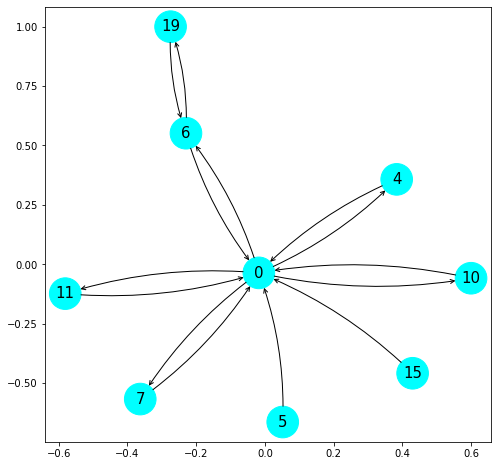

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 266.07it/s]


y: Fake
Removing edges with score less than 0.12359901517629623 with min 0.08269569277763367 and max 0.9183378219604492
Dropping 137 edges out of 274


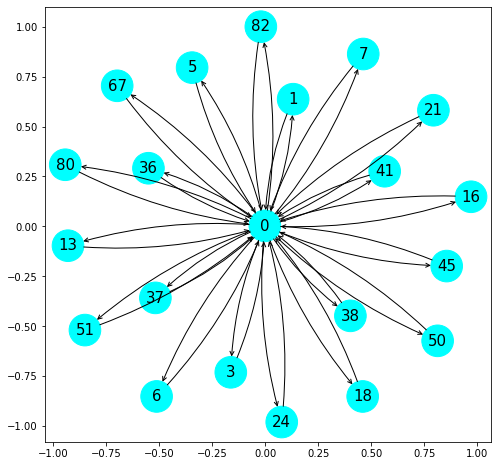

In [8]:
sample_data_list = dataset_manager.get_random_train_samples(device=model.m_args.device, label=0, len_samples=10)
explainers = []
user_ids = []
for sample in sample_data_list:
    e = GNNModelExplainer(model, sample)
    e.visualize_explaining_graph()
    user_ids.append(e.get_node_ids_of_explaining_subgraph())
    explainers.append(e)

### Randomly sample 10 real news instances and explain them

Choosing indexes: [ 21 949 912 861 642 959  54 581 280 894]


Explain graph: 100%|██████████| 200/200 [00:00<00:00, 218.11it/s]


y: Real
Removing edges with score less than 0.8210381865501404 with min 0.10116615146398544 and max 0.9003787040710449
Dropping 56 edges out of 112


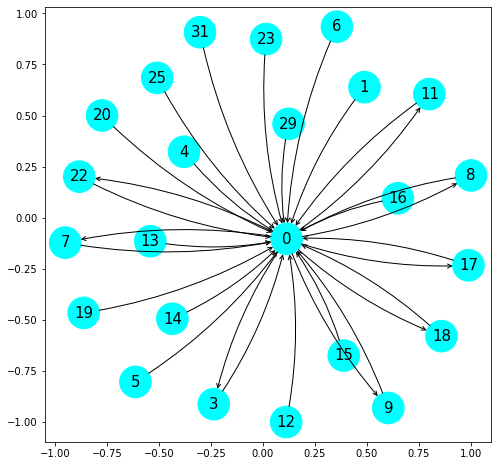

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 214.01it/s]


y: Real
Removing edges with score less than 0.8421948552131653 with min 0.12148115038871765 and max 0.9300832748413086
Dropping 17 edges out of 34


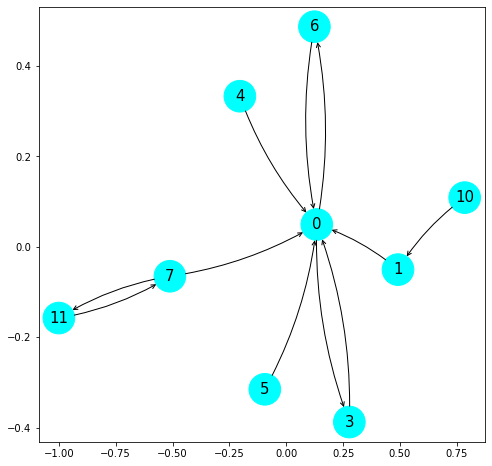

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 260.20it/s]


y: Real
Removing edges with score less than 0.10661160945892334 with min 0.0600421316921711 and max 0.9320695996284485
Dropping 145 edges out of 289


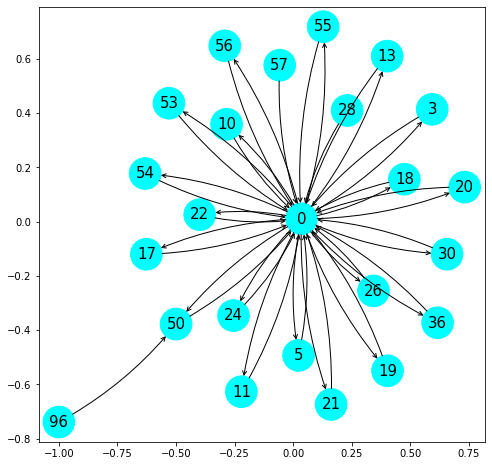

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 341.49it/s]


y: Real
Removing edges with score less than 0.8445059657096863 with min 0.07197879254817963 and max 0.9282962083816528
Dropping 26 edges out of 52


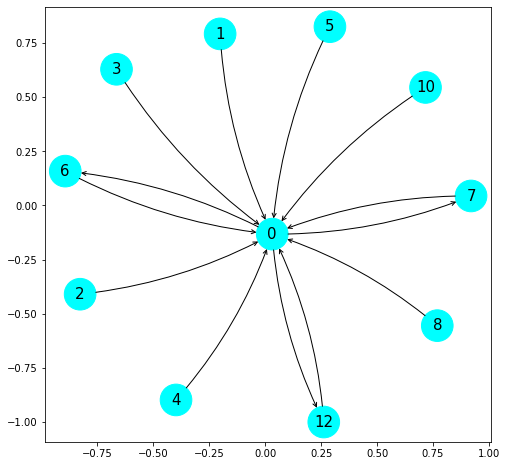

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 338.35it/s]


y: Real
Removing edges with score less than 0.8095394968986511 with min 0.08264124393463135 and max 0.8810644745826721
Dropping 67 edges out of 133


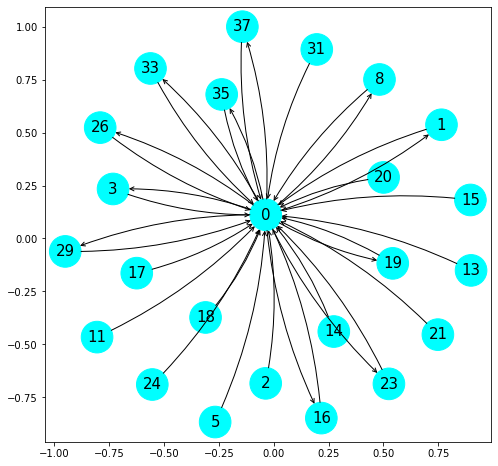

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 344.00it/s]


y: Real
Removing edges with score less than 0.7612339854240417 with min 0.10149483382701874 and max 0.9229169487953186
Dropping 76 edges out of 151


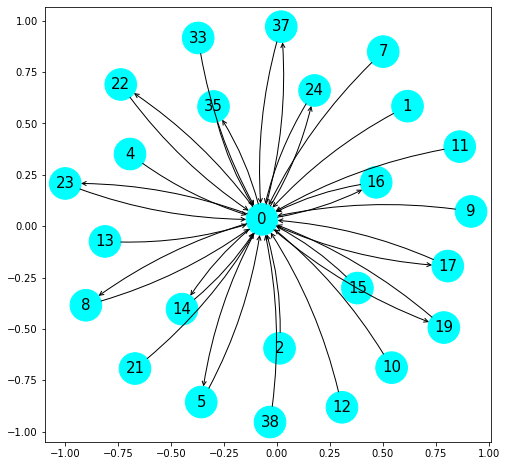

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 341.31it/s]


y: Real
Removing edges with score less than 0.7527292966842651 with min 0.06310806423425674 and max 0.9073489308357239
Dropping 79 edges out of 157


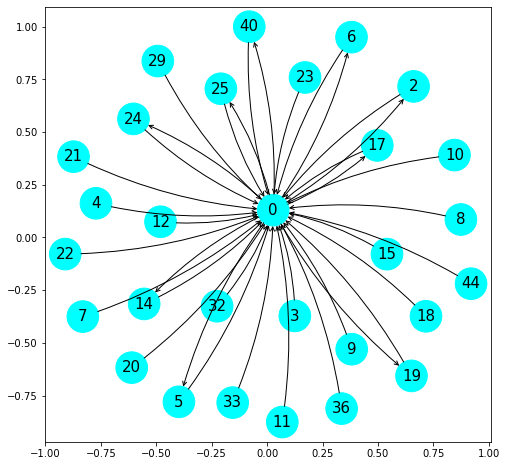

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 283.92it/s]


y: Real
Removing edges with score less than 0.8690564036369324 with min 0.6708942651748657 and max 0.9302178621292114
Dropping 7 edges out of 13


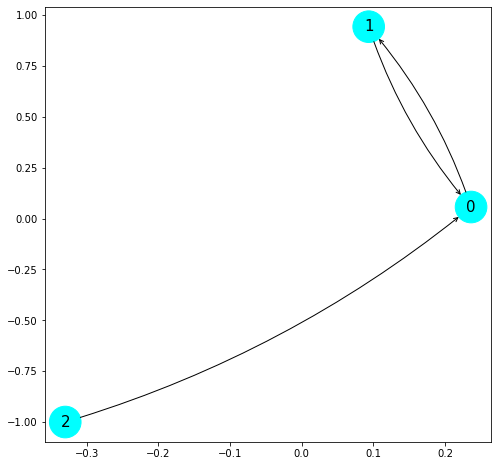

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 217.49it/s]


y: Real
Removing edges with score less than 0.7829709053039551 with min 0.4742801785469055 and max 0.9172025322914124
Dropping 4 edges out of 7


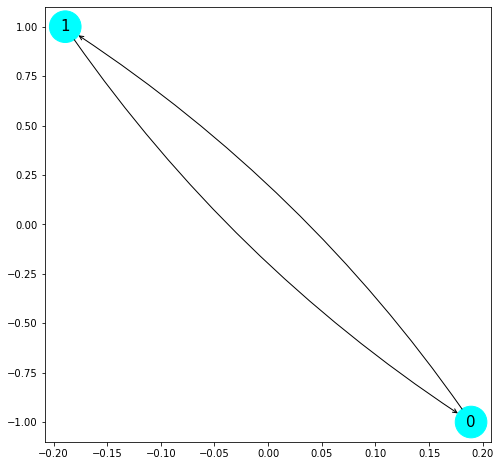

Explain graph: 100%|██████████| 200/200 [00:00<00:00, 216.71it/s]


y: Real
Removing edges with score less than 0.10668652504682541 with min 0.0680401474237442 and max 0.7918869256973267
Dropping 191 edges out of 382


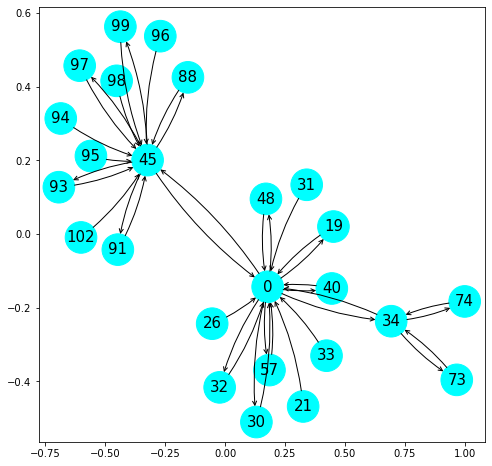

In [9]:
sample_data_list = dataset_manager.get_random_train_samples(device=model.m_args.device, label=1, len_samples=10)
explainers = []
user_ids = []
for sample in sample_data_list:
    e = GNNModelExplainer(model, sample)
    e.visualize_explaining_graph()
    user_ids.append(e.get_node_ids_of_explaining_subgraph())
    explainers.append(e)